<a href="https://colab.research.google.com/github/CHRISTIANDAGATTI/AyVD---Grupo-9/blob/main/CENTRAL_Entregable_PARTE_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>






**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Edición 2022**

---
## Trabajo práctico entregable - Parte 1

In [67]:
import io
import matplotlib
import matplotlib.pyplot as plt
import numpy
import pandas as pd
import seaborn as sns

sns.set_context('talk')

## Lectura del dataset

En la notebook 00 se explican los detalles de la siguiente sección.

In [68]:
url = 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/sysarmy_survey_2020_processed.csv'
df = pd.read_csv(url)

In [69]:
df[:3]

,profile_gender,profile_age,work_country,work_province,profile_years_experience,work_years_in_company,work_years_in_current_position,work_people_in_charge_of,profile_studies_level,profile_studies_level_state,...,work_has_violence_situations,profile_sexual_orientation,profile_has_disabilities,profile_has_disabilities_hiring_difficulties,company_employee_number,company_main_activity,company_recommended,company_diversity_policies,company_extra_benefits,company_best_companies_city
0,Mujer,26,Argentina,Ciudad Autónoma de Buenos Aires,3.0,3.0,3.0,0,Universitario,En curso,...,En mi trabajo actual,Homosexual,NaN,NaN,501-1000,Servicios / Consultoría de Software / Digital,7,2,"Capacitaciones y/o cursos, Comidas pagas / sub...",NaN
1,Hombre,29,Argentina,Corrientes,5.0,2.0,2.0,4,Universitario,En curso,...,Jamás,Heterosexual,Visual,No,201-500,Otras industrias,8,9,"Horarios flexibles, Stock options / RSUs, Viát...",NaN
2,Mujer,22,Argentina,Ciudad Autónoma de Buenos Aires,2.0,0.0,0.0,0,Secundario,Completado,...,En un trabajo anterior,Bisexual o queer,NaN,No,2001-5000,Otras industrias,6,9,"Clases de gimnasia online, Comidas pagas / sub...",NaN


# Ejercicio 1 - Análisis descriptivo

Responder a la pregunta: **¿Cuáles son los lenguajes de programación asociados a los mejores salarios?**

Para ello:
1. Seleccionar las columnas relevantes para analizar.
2. Seleccionar las filas relevantes para analizar. Esto incluye la eliminación de valores extremos y erróneos, pero también puede enfocar el análisis en una sub-población. Por ejemplo, se pueden limitar a personas con un salario mayor que 10000 pesos, o a las personas que trabajan sólo en "Data Science", pero deben justificar su elección y reformular la pregunta inicial de ser necesario.
  * Obtener una lista de los lenguajes de programación más populares. Decidir cuántos y cuáles seleccionan para incluir en el análisis.
  * Para cada una de las otras columnas del punto anterior, elegir los rangos o valores seleccionan para incluir en el análisis.
3. Seleccionar métricas que ayuden a responder la pregunta, y los métodos para analizarlas. Elegir UNA de las siguientes opciones:
  * Comparar las distribuciones de salario para cada lenguaje utilizando visualizaciones. Como la visualización es el producto final, debe ser clara y mostrar información relevante.
  * Comparar medidas de estadística descriptiva sobre la distribución de salario para cada lenguaje. Sean creativos, la estadística descriptiva nos permite decir cosas como: "el 10% de los mejores sueldos los ganan, en su mayoría, programadores que saben kotlin!" (donde *mayoría* es un término medio engañoso que sólo significa más del 50%). Para comparar múltiples lenguajes, les recomendamos usar también visualizaciones.
  * Comparar probabilidades. Por ejemplo: "Si sabés Python o Java, tenés un 30% más de chances de ganar arriba de 100K".

Si lo consideran necesario, realicen varias iteraciones. Es decir, si encuentran que las distribuciones de los lenguajes de programación que seleccionaron inicialmente no son muy diferentes, pueden re-hacer el análisis usando sólo los lenguajes de programación que son diferentes.

In [70]:
# complete here if you want to include more columns
relevant_columns = ['tools_programming_languages', 'salary_monthly_NETO']

### Conteo de frecuencias de los lenguajes de programación

La columna que contiene información sobre los lenguajes de programación utilizados es `tools_programming_languages`. Sus valores son strings con los lenguajes seleccionados separados por comas.



In [71]:
df.tools_programming_languages[:3]

0                     Ninguno
1    HTML, Javascript, Python
2                     Ninguno
Name: tools_programming_languages, dtype: object

Las siguientes celdas de código separan estos lenguajes de programación y cuentan la frecuencia con la que aparecen.

No es necesario entender este código en profundidad, aunque sí es un buen ejercicio.

In [72]:
# Convert the comma-separated string of languages to a list of string.
# Remove 'ninguno de los anteriores' option, spaces and training commas.
def split_languages(languages_str):
  if not isinstance(languages_str, str):
    return []
  # Remove 'other' option
  languages_str = languages_str.lower()\
    .replace('ninguno de los anteriores', '')
  # Split string into list of items
  # Remove spaces and commas for each item
  return [lang.strip().replace(',', '')
          for lang in languages_str.split()]

# Create a new column with the list of languages
df.loc[:, 'cured_programming_languages'] = df.tools_programming_languages\
    .apply(split_languages)
if 'cured_programming_languages' not in relevant_columns:
    relevant_columns.append('cured_programming_languages') 

# Duplicate each row of df for each programming language
# mentioned in the response.
# We only include in df_lang the columns we are going to analyze later, so we
# don't duplicate innecesary information.
df_lang = df.cured_programming_languages\
    .apply(pd.Series).stack()\
    .reset_index(level=-1, drop=True).to_frame()\
    .join(df[relevant_columns])\
    .rename(columns={0: 'programming_language'})
# Horrible programming style! But a lot of data science code can be written with
# as concatenations of functions (pipelines), and there's no elegant way of
# doing that on Python.
df_lang[:5]

,programming_language,tools_programming_languages,salary_monthly_NETO,cured_programming_languages
0,ninguno,Ninguno,43000.0,[ninguno]
1,html,"HTML, Javascript, Python",63000.0,"[html, javascript, python]"
1,javascript,"HTML, Javascript, Python",63000.0,"[html, javascript, python]"
1,python,"HTML, Javascript, Python",63000.0,"[html, javascript, python]"
2,ninguno,Ninguno,127000.0,[ninguno]


En la columna `programming_language` se encuentra cada lenguaje por separado. Notar que si una respuesta contenía 3 lenguajes, como `"HTML, Javascript, Python"`, la fila ha sido replicada 3 veces. Por ello, hay tres filas con índice 1.

In [73]:
language_count = df_lang.programming_language.value_counts()\
    .reset_index()\
    .rename(columns={'index': 'language', 'programming_language': 'frequency'})
language_count[:10]

,language,frequency
0,javascript,2513
1,sql,2154
2,html,1861
3,python,1475
4,java,1453
5,css,1247
6,bash/shell,993
7,php,891
8,.net,823
9,typescript,779


## Filtrado de lenguajes relevantes

El siguiente código permite seleccionar sólo las filas donde el valor de la columna `programming_language` se encuentre en la lista `interesting_languages`.

In [74]:
# Filter out languages that we want to exclude
# Complete here with your selected list.
interesting_languages = ["python"]
filtered_df_lang = df_lang[df_lang.programming_language.isin(interesting_languages)]
filtered_df_lang[:5]

,programming_language,tools_programming_languages,salary_monthly_NETO,cured_programming_languages
1,python,"HTML, Javascript, Python",63000.0,"[html, javascript, python]"
3,python,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...",102000.0,"[bash/shell, c, css, html, java, javascript, p..."
9,python,"Assembler, Bash/Shell, C, C#, Python, R",39000.0,"[assembler, bash/shell, c, c#, python, r]"
10,python,"HTML, Javascript, Python",36800.0,"[html, javascript, python]"
11,python,"Bash/Shell, Python",94621.0,"[bash/shell, python]"


## **Solución ejercicio N° 1:**
# Limpieza de datos
-- Comenzamos generando medidas de estadistica descriptiva de la variable de interes, en este caso del salario neto. --

In [75]:
#Generamos estadisticas descriptivas para el campo de salario neto
df_lang["salary_monthly_NETO"].describe().apply(lambda x: format(x, 'f'))

count      17353.000000
mean      100209.999303
std       104789.198505
min            1.000000
25%        54000.000000
50%        80000.000000
75%       110000.000000
max      2080000.000000
Name: salary_monthly_NETO, dtype: object

-- Observamos que tenemos sueldos netos desde $$ 1 hasta $ 2.080.000, por ende consideramos que el dataframe tiene valores atípicos (outliers) y decidimos filtrar los mismos a partir del calculo de los percentiles 5 y 95, quedandonos solo con los registros para los cuales el sueldo neto se encuentre entre estos valores. --

In [76]:
#Percentil 95 (salario minimo del 5%)
minimo = df_lang["salary_monthly_NETO"].quantile(0.05)
#Percentil 5 (salario maximo del 95%)
maximo = df_lang["salary_monthly_NETO"].quantile(0.95)
print(minimo, maximo)

22500.0 250000.0


-- Ya con los percentiles calculados, generamos un nuevo dataframe filtrado por estos valores. Ademas agregamos un filtro para no tener en cuenta aquellos registros para los cuales en el campo (columna) lenguaje de programacion tiene como respuesta "ninguno", ya que solo nos interesa determinar diferencias de salario entre los distintos lenguajes para responder a:
**¿Cuáles son los lenguajes de programación asociados a los mejores salarios?** --

In [77]:
df_filtered = df_lang[(df_lang["salary_monthly_NETO"] > minimo) & (df_lang["salary_monthly_NETO"] < maximo) ][["programming_language", "salary_monthly_NETO"]]
df_filtered = df_filtered[df_filtered["programming_language"]!= 'ninguno']\
  .rename(columns={'programming_language':'language', 'salary_monthly_NETO':'neto'})
df_filtered 

,language,neto
1,html,63000.0
1,javascript,63000.0
1,python,63000.0
3,bash/shell,102000.0
3,c,102000.0
...,...,...
6090,html,97000.0
6090,javascript,97000.0
6090,php,97000.0
6090,sql,97000.0


-- A continuacion creamos un nuevo dataframe para observar la frecuencia de cada lenguaje, es decir, la cantidad de personas que contestaron en la encuesta que tienen ese lenguaje de programación entre sus conocimientos. --

In [78]:
#Creamos un dataframe para observar los distintos lenguajes y la frecuencia de los mismos
df_cant = df_filtered.language.value_counts()\
 .reset_index()\
    .rename(columns={'index': 'language', 'language': 'frequency'})
df_cant.set_index('language',inplace=True) #Indicamos que la columna Language sea el indice del data frame
df_cant
   

,frequency
language,
javascript,2158
sql,1908
html,1610
java,1290
python,1279
...,...
asp,1
kdb,1
adabas,1


-- Definimos seleccionar aquellos lenguajes de programación que tuviesen una cantidad de frecuencia igual o mayor a 30. Es decir, solo tendremos en cuenta para nuestro analisis todos los lenguajes que aparezcan al menos en 30 respuestas de la encuesta. Para esto armamos una lista con todos estos lenguajes. --

In [79]:
language_list = df_cant[df_cant['frequency']>30].index.to_numpy().tolist()
language_list

['javascript',
 'sql',
 'html',
 'java',
 'python',
 'css',
 'bash/shell',
 'php',
 '.net',
 'typescript',
 'c#',
 'go',
 'c++',
 'c',
 'vba',
 'kotlin',
 'groovy',
 'ruby',
 'scala',
 'swift',
 'r',
 'cobol',
 'abap',
 'perl',
 'objective-c',
 'powershell',
 'delphi',
 'dart']

-- Luego filtramos nuestro df (al que ya le habiamos eliminado outliers y las personas que no tenían como respuesta ningun lenguaje de programación) para quedarnos solo con los registros que posean alguno de los lenguajes de la lista que armamos. --

In [80]:
df_filtered = df_filtered[df_filtered.language.isin(language_list)]
df_filtered

,language,neto
1,html,63000.0
1,javascript,63000.0
1,python,63000.0
3,bash/shell,102000.0
3,c,102000.0
...,...,...
6090,html,97000.0
6090,javascript,97000.0
6090,php,97000.0
6090,sql,97000.0


-- Analizamos medidas de estadistica descriptiva de este nuevo dataframe filtrado para verificar que cambiaron los valores con respecto al dataframe con el que comenzamos y tenemos valores mas aceptables.
Como por ejemplo, interpretar que el sueldo neto mínimo y el maximo se acercan mas a la realidad, como tambien podemos observar que la media y la mediana se "acercaron" y vemos menor desviacion de los datos. --

In [81]:
df_filtered.describe()

,neto
count,14892.000000
mean,87173.603298
std,40966.996538
min,22980.000000
25%,56582.750000
50%,80000.000000
75%,107000.000000
max,248000.000000


# Analisis de datos
-- En este punto consideramos que tenemos un dataframe lo suficientemente limpio y comenzamos con los analisis para responder la pregunta inicial. Para esto vamos a crear un nuevo dataframe para observar los estadisticos (media, minimo, maximo y mediana) del sueldo neto de cada lenguaje. Ademas generamos 2 diagramas de barras para observar la media y mediana de forma grafica. --

In [82]:
#Generamos un dataframe con los estadisticos
#Agrupo por lenguaje y genero la media
df_estatistics = df_filtered.groupby('language').mean()

#Agrego columnas para el minimo, maximo y mediana
df_estatistics['netoMin'] = df_filtered.groupby('language').min()
df_estatistics['netoMax'] = df_filtered.groupby('language').max()
df_estatistics['netoMedian'] = df_filtered.groupby('language').median()

#Renombro la columna de neto a netoMean
#Indicamos que la columna language sea el indice del data frame
df_estatistics = df_estatistics.rename(columns={'neto': 'netoMean', 'index':'language'})

#Ordeno por media del neto
df_estatistics = df_estatistics.sort_values(by = 'netoMean', ascending = False)

df_estatistics

,netoMean,netoMin,netoMax,netoMedian
language,,,,
scala,125533.427245,43590.87,237000.0,119906.5
objective-c,118628.775000,26000.00,200000.0,114000.0
go,112862.872886,35000.00,248000.0,105750.0
kotlin,108986.180000,27000.00,230000.0,105500.0
groovy,105448.278732,29550.00,240000.0,98500.0
swift,105083.154762,29800.00,230000.0,97000.0
ruby,101270.577965,27000.00,240000.0,91000.0
cobol,97513.888889,35000.00,225000.0,88639.5
delphi,96208.734286,27000.00,225000.0,85000.0


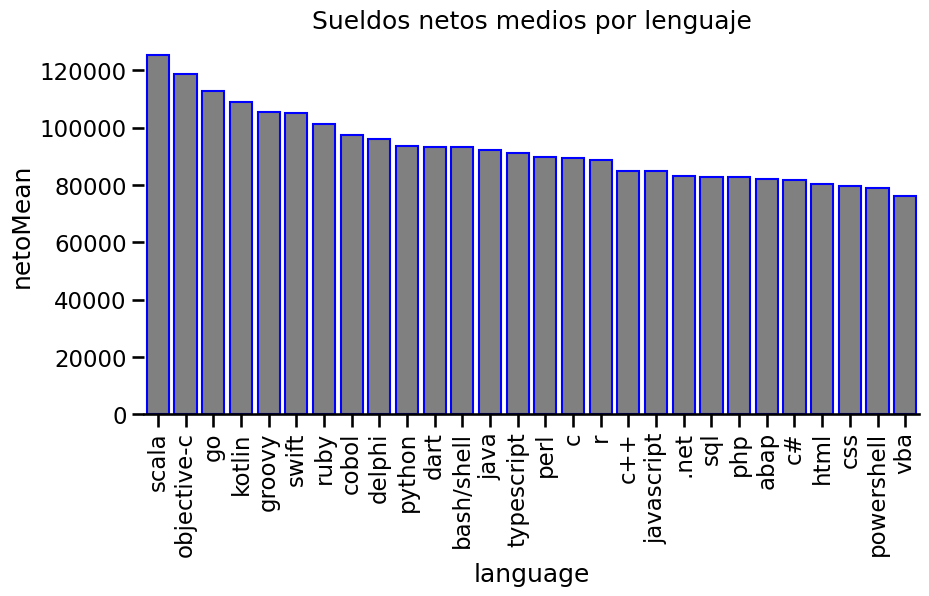

In [83]:
# Realizamos un grafico de barras para comparar y ver graficamente los salarios medios de cada uno de los lenguajes de nuestra universo analizado.
# Podemos observar que el sueldo neto medio mas alto le corresponde al lenguaje de programación "Scala" y el mas bajo a "vba".
figura = plt.figure(figsize=(10,5), dpi=100)
ax = figura.gca()
ax.set_ylabel('Neto')
ax.set_xlabel('Lenguaje')
ax.set_title('Sueldos netos medios por lenguaje')
ax.set_xticklabels('Lenguaje', rotation= 90)

sns.barplot(data= df_estatistics, x= df_estatistics.index, y= "netoMean", ci=None, ax=ax, color = 'grey', edgecolor = 'blue')
sns.despine(left=True)

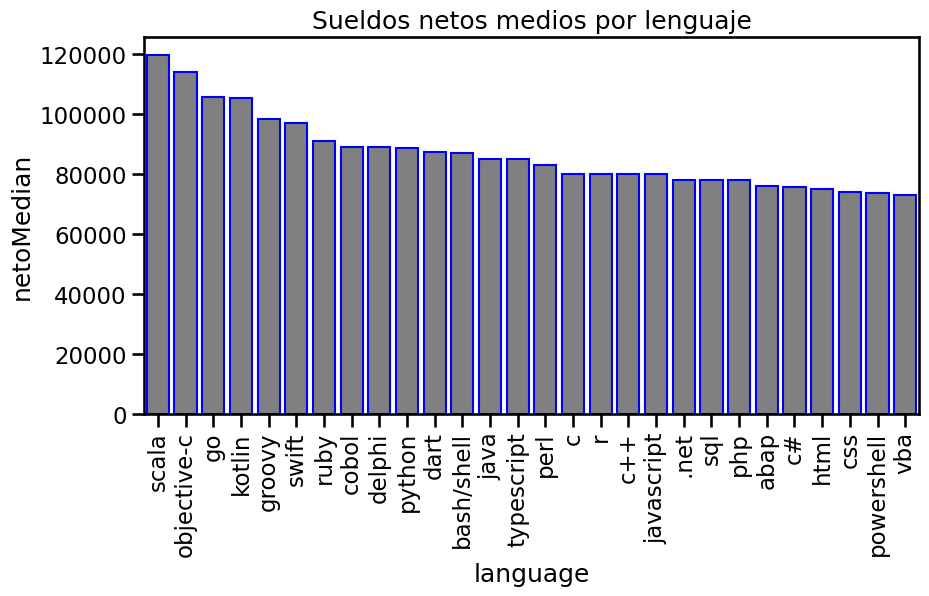

In [84]:
# Realizamos un grafico de barras para comparar entre los lenguajes y ver graficamente la mediana de los salarios.
# Nuevamente observamos que la mediana (valor en la posicion central de cada lenguaje) mas alta correponde al lenguaje "Scala" y la mas baja a "vba".
# Asi mismo vemos gráficamente que el orden descendente de cada uno de los lenguajes de programación no varian ya sea respecto a su media o a su mediana. 
figura = plt.figure(figsize=(10,5), dpi=100)
ax = figura.gca()
ax.set_xlabel('Lenguaje')
ax.set_ylabel('Neto')
ax.set_title('Sueldos netos medios por lenguaje')
ax.set_xticklabels('Lenguaje', rotation= 90)

sns.barplot(data= df_estatistics.sort_values(by = 'netoMedian', ascending = False), x= df_estatistics.index, y= "netoMedian", ci=None, ax=ax, color = 'grey', edgecolor = 'blue')

-- A continuacion calculamos el percentil 75 en función del salario neto de cada lenguaje de programación y determiamos que vamos a considerar "mejores salarios" a aquellas personas que tengan un sueldo neto por encima de este valor. --

In [85]:
#Calculamos el percentil 75 (salario minimo del 25%) 
perc75 = df_filtered["neto"].quantile(0.75)
perc75

107000.0

-- Creamos un nuevo dataframe, calculando las frecuencias de cada lenguaje con sueldos mayores al percentil 75. --

In [86]:
#Creamos un nuevo df
df_filteredPerc75 = df_filtered[df_filtered['neto'] > perc75].groupby('language').count()\
    .reset_index()\
    .rename(columns={'index': 'language'})
df_filteredPerc75 = df_filteredPerc75.rename(columns={'neto': 'frequency'})

df_filteredPerc75.set_index('language',inplace=True)
df_filteredPerc75 = df_filteredPerc75.sort_values(by= 'frequency', ascending=False)

#Calculo cuantos son los registros que tengo para el perc 75
cantPerc75 = df_filteredPerc75['frequency'].sum()

print("Cantidad de registros que superan al Percentil 75:", cantPerc75)
df_filteredPerc75


Cantidad de registros que superan al Percentil 75: 3700


,frequency
language,
javascript,498
sql,402
java,381
python,374
html,306
bash/shell,258
css,202
typescript,188
php,179


-- Ahora creamos un nuevo dataframe calculando para cada lenguaje la probabilidad condicional de ganar mas que el percentil 75 sabiendo ese lenguaje.--

In [87]:
# Agregamos una columna con la frecuencia total de cada lenguaje de nuestro universo completo.
df_compare = df_filteredPerc75
df_compare['Frecuencia'] = df_cant ['frequency']
df_compare = df_compare.rename(columns = {'frequency': 'FrecPerc75'})

#Agregamos una columna con la probabilidad condicional
#Probabilidad condicional: Probabilidad de ganar mas que el percentil 75 sabiendo el lenguage x
df_compare['ProbCond'] = round((df_compare['FrecPerc75'] / df_compare['Frecuencia']),3)  

#Reordeno para que quede primero la frecuencia, luego la frecuencia del percentil 75 y ultima la probabilidad condicional
df_compare = df_compare[['Frecuencia', 'FrecPerc75','ProbCond']]

#Ordenamos descendente por la probabilidad condicional
df_compare = df_compare.sort_values(by = 'ProbCond', ascending = False)
df_compare

,Frecuencia,FrecPerc75,ProbCond
language,,,
objective-c,40,23,0.575
scala,98,56,0.571
go,246,120,0.488
kotlin,162,79,0.488
swift,84,36,0.429
ruby,113,44,0.389
groovy,142,50,0.352
cobol,72,24,0.333
java,1290,381,0.295


-- Podemos observar según el analisis anterior que por ejemplo la probabilidad de ganar mas del Percentil 75 ($105.000) sabiendo el lenguaje de programación "objective-c" es del 60% y del 57% sabiendo "scala". --

-- Analizamos ahora la probabilidad condicional de ganar mas que el percentil 75 sabiendo cualquier lenguaje de programacion. --

In [88]:
#Probabilidad condicionada
cantTotal = df_compare['Frecuencia'].sum()
cantPerc75 = df_compare['FrecPerc75'].sum()
print('Frecuencias totales:', cantTotal)
print('Frecuencias superiores al percentil 75:', cantPerc75)

probCond = round(cantPerc75 / cantTotal, 3)
print('Probabilidad condicional:', probCond)

Frecuencias totales: 14892
Frecuencias superiores al percentil 75: 3700
Probabilidad condicional: 0.248


-- La probabilidad de ganar mas que el percentil 75 sabiendo cualquiera de los lenguajes de programación es igual a 24,70 %. --

In [89]:
#Agregamos una columna para ver al diferencia entre las probabilidades contra la total
df_compare['difProbCond'] = df_compare['ProbCond'] - probCond
df_compare

,Frecuencia,FrecPerc75,ProbCond,difProbCond
language,,,,
objective-c,40,23,0.575,0.327
scala,98,56,0.571,0.323
go,246,120,0.488,0.240
kotlin,162,79,0.488,0.240
swift,84,36,0.429,0.181
ruby,113,44,0.389,0.141
groovy,142,50,0.352,0.104
cobol,72,24,0.333,0.085
java,1290,381,0.295,0.047


#Conclusion:
**¿Cuáles son los lenguajes de programación asociados a los mejores salarios?**

En función de lo dicho anteriormente podemos concluir que los lenguajes de programación asociados a los mejores salarios son:
"objective-c", "scala" y "kotlin".





In [90]:
df_filtered_ob = df_filtered[df_filtered.language == 'objective-c'].sort_values(by = 'neto', ascending = False)
df_filtered_ob.head()

,language,neto
26,objective-c,200000.0
1873,objective-c,200000.0
5184,objective-c,200000.0
4014,objective-c,197000.0
248,objective-c,185000.0


In [91]:
df_filtered_sc = df_filtered[df_filtered.language == 'scala'].sort_values(by = 'neto', ascending = False)
df_filtered_sc.head()

,language,neto
1472,scala,237000.0
1363,scala,220000.0
1793,scala,220000.0
2585,scala,215000.0
4539,scala,210600.0


In [92]:
df_filtered_ko = df_filtered[df_filtered.language == 'kotlin'].sort_values(by = 'neto', ascending = False)
df_filtered_ko.head()

,language,neto
5449,kotlin,230000.0
2006,kotlin,210000.0
3330,kotlin,200000.0
5828,kotlin,200000.0
4685,kotlin,200000.0


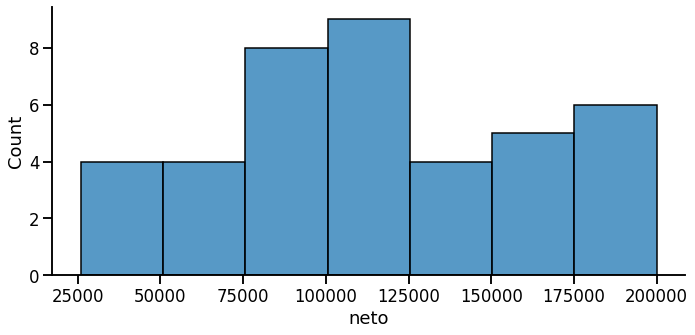

In [93]:
#Histograma de frecuencia de sueldos netos para lenguaje "Objective - c"
sns.displot(df_filtered_ob['neto'], aspect=2)

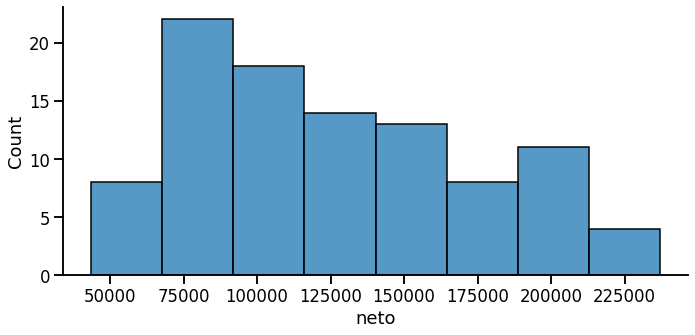

In [94]:
#Histograma de frecuencia de sueldos netos para lenguaje "Scala"
sns.displot(df_filtered_sc['neto'], aspect=2)

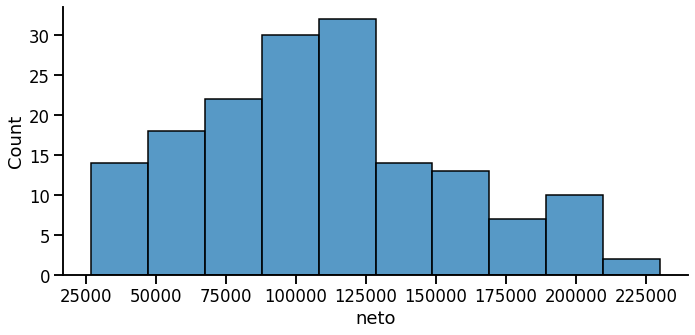

In [95]:
#Histograma de frecuencia de sueldos netos para lenguaje "Kotlin"
sns.displot(df_filtered_ko['neto'], aspect=2)

-- De la compración de la distribución de frecuencias en función de los sueldos netos de los tres lenguajes mencionados observamos que si bien "objective-c" es el que menor sueldo neto ma´ximo presenta es tambien el que tiene mayor frecuencia en sueldos superiores al percentil 75, con lo cual refuerzo o valida lo dicho anteriormente. --

# Ejercicio 2 - Densidades y varias variables

Responder a la pregunta general: **¿Que herramientas (prácticas y teóricas) són útiles para explorar la base, descubrir patrones, asociaciones?**

Para ello considere (igual al ejercicio Anterior):
1. Seleccionar las columnas relevantes para analizar.
2. Seleccionar las filas relevantes para analizar. Esto incluye la eliminación de valores extremos y erróneos, pero también puede enfocar el análisis en sub-poblaciones. 

----------------------------------------------------------------------
## Solución:
### Elección de las variables

**Variables categóricas**: Género y Provincia

**Variables numéricas**: Sueldo neto, Años de experiencia, Edad

---------------------------------------------------------------------

--  Para empezar a analizar las variables elegidas, primero hacemos una exploración de los datos en cada una.

En el caso de las variables categóricas, calculamos las frecuencias de cada categoría --

In [96]:
#Calculamos las frecuencias para la variable Género ("profile_gender")
(df.groupby("profile_gender")
  .agg(frequency=("profile_gender", "count")))

,frequency
profile_gender,
Hombre,5122
Mujer,942
Otros,31


In [97]:
#Calculamos las frecuencias para la variable Provincia ("work_province")
(df.groupby("work_province")
  .agg(frequency=("work_province", "count")).sort_values(by = 'frequency', ascending = False))

,frequency
work_province,
Ciudad Autónoma de Buenos Aires,3764
GBA,524
Provincia de Buenos Aires,497
Córdoba,456
Santa Fe,354
Mendoza,107
Entre Ríos,66
Río Negro,38
Neuquén,36


In [98]:
#Generamos un nuevo DataFrame con las columnas elegidas para este ejercicio
df_ej2=df[['work_province','profile_gender', 'profile_years_experience', 'profile_age', 'salary_monthly_NETO']]
df_ej2

,work_province,profile_gender,profile_years_experience,profile_age,salary_monthly_NETO
0,Ciudad Autónoma de Buenos Aires,Mujer,3.0,26,43000.000
1,Corrientes,Hombre,5.0,29,63000.000
2,Ciudad Autónoma de Buenos Aires,Mujer,2.0,22,127000.000
3,Corrientes,Hombre,15.0,39,102000.000
4,Ciudad Autónoma de Buenos Aires,Hombre,9.0,32,106000.000
...,...,...,...,...,...
6090,Ciudad Autónoma de Buenos Aires,Hombre,13.0,37,97000.000
6091,Ciudad Autónoma de Buenos Aires,Hombre,12.0,38,71000.000
6092,Ciudad Autónoma de Buenos Aires,Hombre,2.0,24,45.753
6093,La Pampa,Hombre,5.0,28,72.000


--- Aquí exploramos las variables numéricas a traves de medidas de estadisitica descriptiva ---

In [99]:
df_ej2.describe().apply(lambda s: s.apply('{0:.2f}'.format))

,profile_years_experience,profile_age,salary_monthly_NETO
count,6095.00,6095.00,5883.00
mean,8.93,41.18,94907.95
std,7.16,665.72,96862.26
min,0.00,18.00,1.00
25%,3.00,27.00,51480.00
50%,7.00,31.00,78000.00
75%,13.00,37.00,106000.00
max,115.00,52000.00,2080000.00


En las variables numéricas vemos algunos problemas como errores de tipeo o o de puntuación, que pueden observarse por ejemplo en los valores maximos en Años de experiencia (115 años) y en Edad (52000) y en los valores mínimos y máximos del Sueldo neto como habiamos mencionado anteriormente (hay sueldos desde 1000 a 2 millones de pesos).

Por ello, al igual que en el ejercicio anterior, filtramos las filas eliminando los valores muy altos y muy bajos de Sueldos netos por considerarlos outliers. Además, eliminamos los valores muy altos de Edad y de Años de experiencia.

In [100]:
#Calculamos los percentiles 5 y 95 respecto al Salario mensual Neto
#Percentil 5 (salario minimo del 95%)
minimo = df_ej2["salary_monthly_NETO"].quantile(0.05)
#Percentil 95 (salario maximo del 95%)
maximo = df_ej2["salary_monthly_NETO"].quantile(0.95)
print(minimo, maximo)

22500.0 210000.0


In [101]:
#Aquí armamos un nuevo DataFrame filtrando en Sueldos de acuerdo a los percentiles del 5 y 95
#Además agregamos el filtrado de 50 años de experiencia y de 99 años de edad como máximos para cada caso

df_ej2filt = df_ej2[ (df_ej2["salary_monthly_NETO"] > minimo) & (df_ej2["salary_monthly_NETO"] < maximo) ][['work_province','profile_gender', 'profile_years_experience', 'profile_age', 'salary_monthly_NETO']]
df_ej2filt = df_ej2filt[df_ej2filt['profile_years_experience'] <= 50]
df_ej2filt = df_ej2filt[df_ej2filt['profile_age'] <= 99]
df_ej2filt= df_ej2filt.rename(columns={'work_province':'provincia','salary_monthly_NETO':'neto','profile_gender':"genero",'profile_years_experience':'años_experiencia','profile_age':'edad'})
df_ej2filt

,provincia,genero,años_experiencia,edad,neto
0,Ciudad Autónoma de Buenos Aires,Mujer,3.0,26,43000.0
1,Corrientes,Hombre,5.0,29,63000.0
2,Ciudad Autónoma de Buenos Aires,Mujer,2.0,22,127000.0
3,Corrientes,Hombre,15.0,39,102000.0
4,Ciudad Autónoma de Buenos Aires,Hombre,9.0,32,106000.0
...,...,...,...,...,...
6088,Provincia de Buenos Aires,Hombre,13.0,32,56450.0
6089,Ciudad Autónoma de Buenos Aires,Hombre,10.0,32,130000.0
6090,Ciudad Autónoma de Buenos Aires,Hombre,13.0,37,97000.0
6091,Ciudad Autónoma de Buenos Aires,Hombre,12.0,38,71000.0


In [102]:
#Chequeamos nuevamente las medidas de estadistica descriptiva del nuevo dataFrame filtrado
df_ej2filt.describe()

,años_experiencia,edad,neto
count,5278.000000,5278.000000,5278.000000
mean,8.746514,32.494505,82448.181628
std,6.979284,7.221755,36965.211354
min,0.000000,18.000000,22980.000000
25%,3.000000,27.000000,54000.000000
50%,7.000000,31.000000,77600.000000
75%,13.000000,37.000000,102000.000000
max,44.000000,67.000000,209480.000000


## a) Densidad conjunta

Que herramientas visuales y modelos puede utilizar para estudiar la distribución y comportamiento de sus datos? 

Elija tres variables numéricas y 2 variables categóricas. Visualice la base según varias de las variables elegidas. Puede describir de alguna forma el comportamiento de sus datos? Que herramientas utilizaría? Describa




--------------------------------------------------------------------------------
**Visualizaciones de varias variables**

-- Para explorar la relación entre diferentes variables categóricas es posible usar tablas de contingencia --

In [103]:
#Tabla de contingencia con frecuencias absolutas
pd.crosstab(df_ej2filt.provincia, df_ej2filt.genero).sort_values(by = 'Mujer', ascending = False)

genero,Hombre,Mujer,Otros
provincia,,,
Ciudad Autónoma de Buenos Aires,2683,615,18
Córdoba,327,49,2
Provincia de Buenos Aires,368,46,2
GBA,392,44,0
Santa Fe,265,43,1
Mendoza,80,11,0
Corrientes,12,4,0
Río Negro,30,4,0
Neuquén,31,3,0


-- En la tabla de contingencia que se muestra debajo, se observan las frecuencias relativas. De esta manera es posible observar entre otras cosas que el 50% de las personas encuestadas son Hombres que viven en CABA, y el 11% corresponde a mujeres de esa misma ciudad. En orden de importancia, los programadores hombres tambien se encuentran en: GBA (7%), Cordoba (6%), y Santa Fe (%5). --

In [104]:
#Tabla de contingencia con frecuencias relativas con respecto al total de las muestras
pd.crosstab(df_ej2filt.provincia, df_ej2filt.genero, normalize = True).sort_values(by = 'Mujer', ascending = False)

genero,Hombre,Mujer,Otros
provincia,,,
Ciudad Autónoma de Buenos Aires,0.508336,0.116521,0.003410
Córdoba,0.061955,0.009284,0.000379
Provincia de Buenos Aires,0.069723,0.008715,0.000379
GBA,0.074271,0.008336,0.000000
Santa Fe,0.050208,0.008147,0.000189
Mendoza,0.015157,0.002084,0.000000
Corrientes,0.002274,0.000758,0.000000
Río Negro,0.005684,0.000758,0.000000
Neuquén,0.005873,0.000568,0.000000


-- Al calcular las frecuencias relativas por Género, podemos ver que el 60% de los programadores hombres se encuentran en CABA, y el 17% en el resto de la Provincia de Bs. AS (8,8% en GBA y 8,3% en Provincia). Ademas, el 7% se encuentra en Córdoba y el 5,9% en Santa Fe. En el caso de las mujeres, el 74% se encuentran en CABA, el 5,9% en Cordoba, 5.1% en Santa Fe, y 5.3% en GBA. Para el caso del género "Otros", la mayoria se encuentra en CABA (72%), siendo mínimos los porcentajes encontrados en otras provincias del pais (poca frecuencia en el dataset). --

In [105]:
#Tabla de contingencia con frecuencias relativas de programadores por provincia dentro de cada genero (normalización con respecto al subtotal correspondiente a cada columna).
pd.crosstab(df_ej2filt.provincia, df_ej2filt.genero, normalize = "columns").sort_values(by = 'Mujer', ascending = False)

genero,Hombre,Mujer,Otros
provincia,,,
Ciudad Autónoma de Buenos Aires,0.606602,0.740964,0.72
Córdoba,0.073932,0.059036,0.08
Provincia de Buenos Aires,0.083201,0.055422,0.08
GBA,0.088628,0.053012,0.00
Santa Fe,0.059914,0.051807,0.04
Mendoza,0.018087,0.013253,0.00
Corrientes,0.002713,0.004819,0.00
Río Negro,0.006783,0.004819,0.00
Neuquén,0.007009,0.003614,0.00


Lo observado en las Tablas de contingencia anteriores, se puede observar de manera gráfica en el siguiente Heatmap:

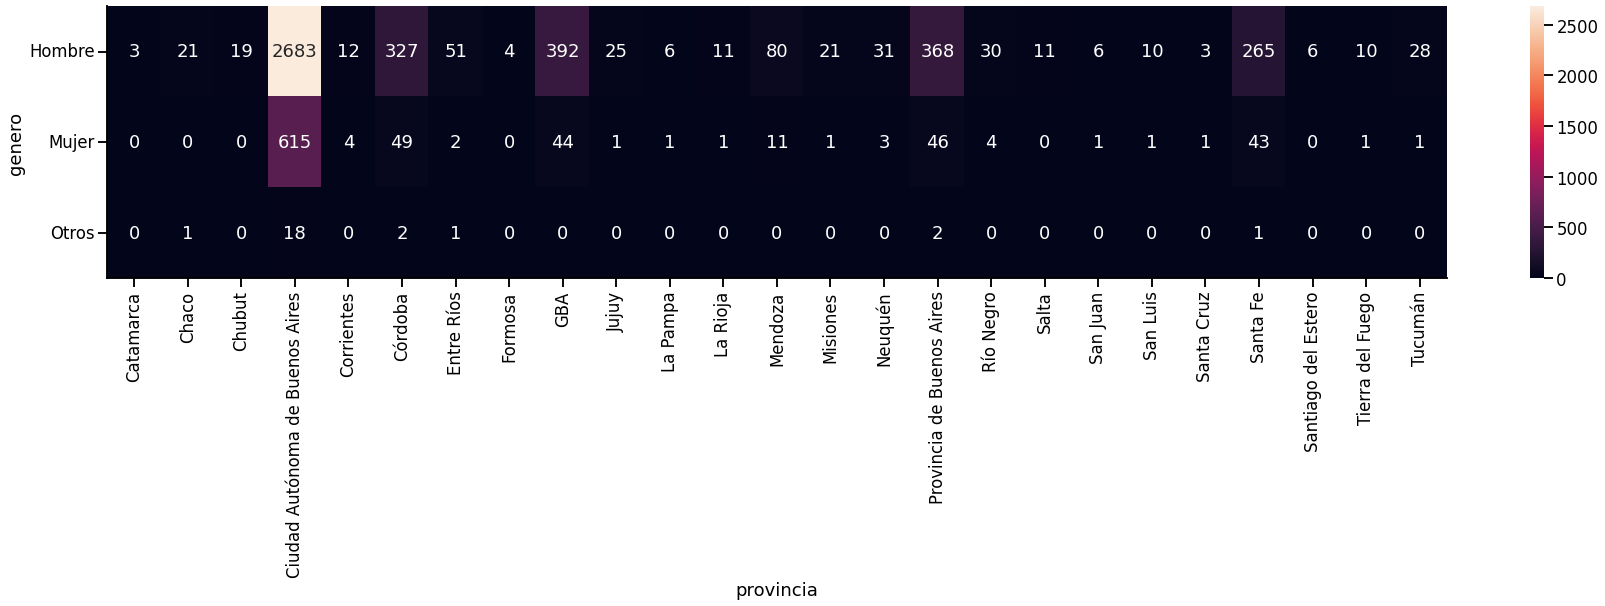

In [106]:
#Hacemos un Heatmap cruzando Genero y Provincia, en las celdas se muestras las frecuencias absolutas
fig = plt.figure(figsize=(30,5))
exp = pd.crosstab(df_ej2filt.genero,
                  df_ej2filt.provincia)
sns.heatmap(exp, annot=True, fmt='g')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
sns.despine()

**Densidades conjunta entre variables numéricas**

En primer lugar, exploramos la relación entre la Edad y los Años de experiencia de los programadores, en función del sueldo neto que perciben. La linea de regresión nos permite visualizar una relación positiva entre el Sueldo y los años de experiencia y el Sueldo y la edad, siendo mas clara en el primer caso.

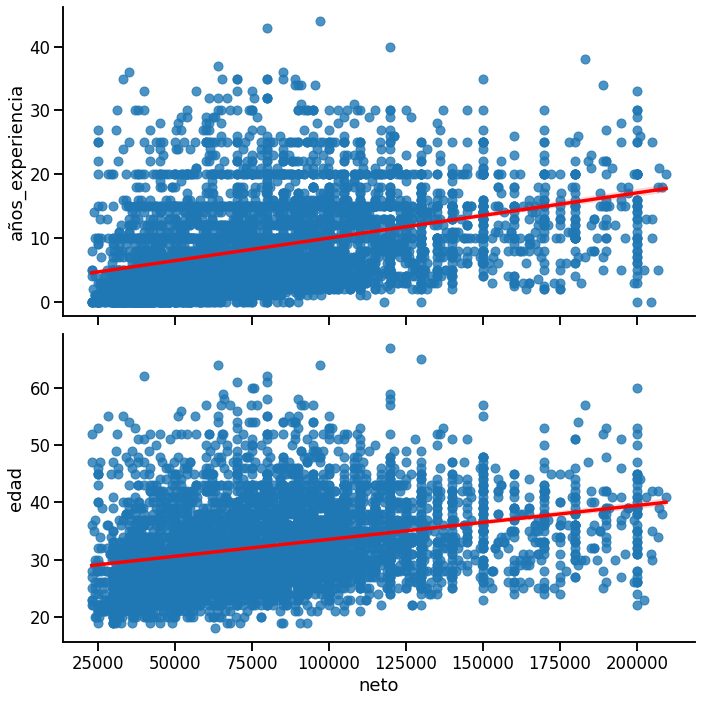

In [107]:
#Scatterplots comparativos de Edad y Años de experiencia en función del Sueldo neto. Se agrega una linea de regresión
sns.pairplot(data=df_ej2filt,
                 y_vars=['años_experiencia', 'edad'],
                 x_vars=['neto'], kind = 'reg', plot_kws={'line_kws':{'color':'red'}},
                 aspect=2, height=5)

Utilizamos las variables categóricas "Genero" y "Provincia" para explorar las relaciones y posibles patrones de la variable "Sueldo Neto". 

Para los géneros Hombre y Mujer, el patrón de distribucion de los Sueldos netos son similares, con mas frecuencia, en ambos casos, de sueldos hasta 130 mil pesos, y menor frecuencia de sueldos altos. Para el genero otros, si bien hay pocos datos, la mayor parte percibe sueldos bajos (40 mil pesos aproximadamente). Sin embargo, si observamos el grafico de Frecuencias relativas vs Sueldos netos, podemos observar que para el genero "Mujer" hay un mayor porcentaje de personas que perciben sueldos menores a 75 mil pesos en comparación con los hombres.

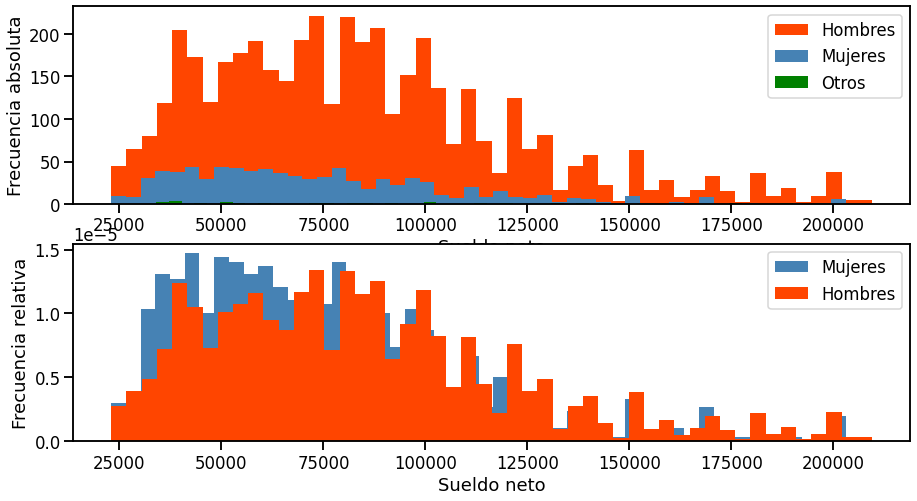

In [36]:
#Definimos el tamaño de los graficos, y las categorias a utilizar en el grafico
plt.figure(figsize=(15,8))
df_H= df_ej2filt[df_ej2filt['genero']=='Hombre']
df_M=df_ej2filt[df_ej2filt['genero']=='Mujer']
df_O=df_ej2filt[df_ej2filt['genero']=='Otros']

plt.subplot(2, 1, 1) # Cree una nueva subimagen, cuadrícula 2x1, número de serie 1, el primer número es el número de filas, 
#el segundo número es el número de columnas, que indica la disposición de las subimágenes, y el tercer número es el número de serie de las subimágenes
plt.hist(df_H["neto"], color='orangered', bins=50, label="Hombres")
plt.hist(df_M["neto"], color='steelblue', bins=50, label="Mujeres") 
plt.hist(df_O["neto"], color='green', bins=50, label="Otros")
plt.xlabel("Sueldo neto")
plt.ylabel("Frecuencia absoluta")
plt.legend(loc='upper right')

plt.subplot(2, 1, 2) # Cree un nuevo subgrafico, cuadrícula 2x1, número de secuencia 2
plt.hist(df_M["neto"], color='steelblue', bins=50, label="Mujeres", density = True) 
plt.hist(df_H["neto"], color='orangered', bins=50, label="Hombres", density = True)
#plt.hist(df_O["neto"], color='green', bins=50, label="Otros", density = True) #Eliminamos el genero "otros" porque los pocos datos generan ruido en el grafico
plt.xlabel("Sueldo neto")
plt.ylabel("Frecuencia relativa")
plt.legend(loc='upper right')
plt.show()

-- En el histograma de abajo elegimos las 5 localidades geograficas con mas cantidad de programadores para comparar la distribucion de sueldos en cada una. Realizamos los graficos con Frecuencia absoluta y relativa. En este caso, resulta de mas utilidad el grafico de Frecuencia relativa. Se observan distribuciones muy similares entre las localidades, con mayor porcentaje de sueldos hasta 110 mil pesos aproximadamente para todos los casos. En este caso, CABA muestra una distirbución un tanto mas diferente al resto, con un gran porcentaje de sueldos cercano a los 100 mil pesos, a diferencia del resto donde los sueldos mas comunes se encuentran entre los 50 y 75 mil pesos. --

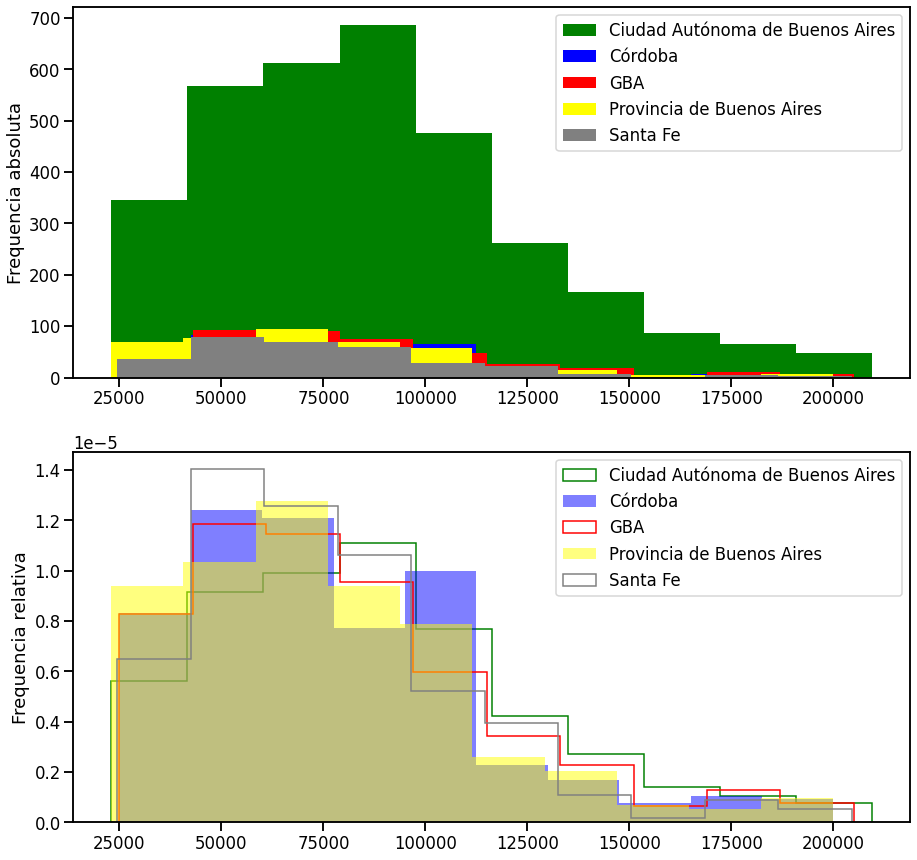

In [108]:
#Definimos el tamaño de los graficos, y las categorias a utilizar en el grafico
plt.figure(figsize=(15,15))
x1 = df_ej2filt[df_ej2filt['provincia']== 'Ciudad Autónoma de Buenos Aires']
x2 = df_ej2filt[df_ej2filt['provincia']== 'Córdoba']
x3 = df_ej2filt[df_ej2filt['provincia']== 'GBA']
x4 = df_ej2filt[df_ej2filt['provincia']== 'Provincia de Buenos Aires']
x5 = df_ej2filt[df_ej2filt['provincia']== 'Santa Fe']

plt.subplot(2, 1, 1) # Cree una nueva subimagen, cuadrícula 2x1, número de serie 1, el primer número es el número de filas, 
#el segundo número es el número de columnas, que indica la disposición de las subimágenes, y el tercer número es el número de serie de las subimágenes
plt.hist(x1["neto"], color='green', label='Ciudad Autónoma de Buenos Aires')
plt.hist(x2["neto"], color='blue', label='Córdoba')
plt.hist(x3["neto"], color='red', label='GBA')
plt.hist(x4["neto"], color='yellow', label='Provincia de Buenos Aires')
plt.hist(x5["neto"], color='grey', label='Santa Fe')
plt.gca().set(ylabel='Frequencia absoluta')
plt.legend()

plt.subplot(2, 1, 2) # Cree un nuevo subgrafico, cuadrícula 2x1, número de secuencia 2
plt.hist(x1["neto"], color='green', label='Ciudad Autónoma de Buenos Aires', density = True, histtype='step')
plt.hist(x2["neto"], color='blue', label='Córdoba', density = True, alpha=0.5)
plt.hist(x3["neto"], color='red', label='GBA', density = True,  histtype='step')
plt.hist(x4["neto"], color='yellow', label='Provincia de Buenos Aires', density = True,  alpha=0.5)
plt.hist(x5["neto"], color='grey', label='Santa Fe', density = True,  histtype='step')
plt.gca().set(ylabel='Frequencia relativa')
plt.legend()



## b) Asociación

* Necesitamos decidir si sacar o no la columna de salario bruto. Para hacer la encuesta más simple.
¿Existe una correlación entre el salario bruto y el neto? Que abordaje y medidas usaría



--------------------------------------------------------------------------------
-- Para observar la correlación entre Sueldo neto y Sueldo bruto, en primer lugar, necesitamos explorar las variables. En este caso, Sueldo neto habia sido abordado en los ejercicios anteriores, por lo que solo necesitamos explorar Sueldo bruto, y lo hacemos por medio de su estadisitca descriptiva. Podemos observar que tambien hay algunos valores erroneos y outliers (notorios en los valores minimos y maximos). Por esa razón, filtraremos ambas variables Sueldo, eliminando los valores menores y mayores a los percentiles del 5 y 95, respectivamente. --

In [110]:
#estadistica descriptiva de Salario bruto
df.salary_monthly_BRUTO.describe().apply(lambda x: format(x, 'f'))

count       6095.000000
mean      124058.549621
std       122912.351839
min            1.000000
25%        61595.000000
50%        96000.000000
75%       145000.000000
max      2180000.000000
Name: salary_monthly_BRUTO, dtype: object

In [111]:
#Calculamos los percentiles para cada variable
#Percentil 95 (salario neto minimo del 5%)
minimoNeto = df["salary_monthly_NETO"].quantile(0.05)
#Percentil 5 (salario neto maximo del 95%)
maximoNeto = df["salary_monthly_NETO"].quantile(0.95)

#Percentil 95 (salario bruto minimo del 5%)
minimoBruto = df["salary_monthly_BRUTO"].quantile(0.05)
#Percentil 5 (salario bruto maximo del 95%)
maximoBruto = df["salary_monthly_BRUTO"].quantile(0.95)

In [120]:
#Creamos un nuevo DataFrame para este ejercicio, que contiene los Sueldos neto y bruto filtrados segun los percentiles elegidos
df_ej2Corr=df[(df["salary_monthly_NETO"] > minimoNeto) & (df["salary_monthly_NETO"] < maximoNeto)][(df["salary_monthly_BRUTO"] > minimoBruto) & (df["salary_monthly_BRUTO"] < maximoBruto)] [["salary_monthly_NETO", "salary_monthly_BRUTO"]]
df_ej2Corr= df_ej2Corr.rename(columns={'salary_monthly_NETO':'neto',"salary_monthly_BRUTO":"bruto"})

df_ej2Corr

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,neto,bruto
0,43000.0,53000.0
1,63000.0,79000.0
2,127000.0,160000.0
3,102000.0,130000.0
4,106000.0,140000.0
...,...,...
6088,56450.0,69000.0
6089,130000.0,180000.0
6090,97000.0,99000.0
6091,71000.0,85000.0


Para observar de manera gráfica la relación entre las variables, generamos un scatterplot. Puede observarse una clara tendencia positiva entre ambas.

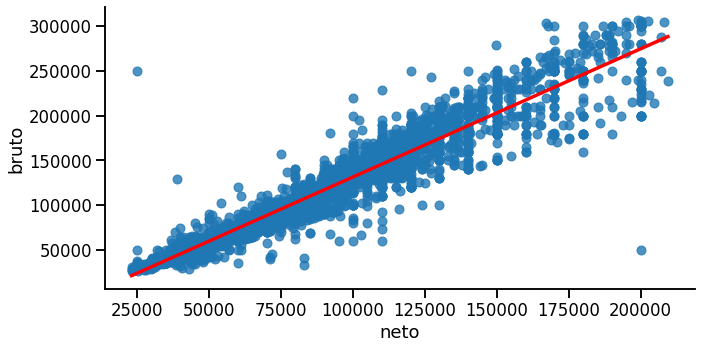

In [121]:
#Scatterplot con linea de regresión
sns.pairplot(data=df_ej2Corr,
                 y_vars=['bruto'],
                 x_vars=['neto'], kind = 'reg', plot_kws={'line_kws':{'color':'red'}},
                 aspect=2, height=5)

-- Para determinar de manera estadistica la correlacion entre ambas variables, necesitamos analizar primero si los datos cumplen con el supuesto de normalidad, para poder elegir el test de correlación adecuado. Como vemos en el test, no existen evidencias para descartar la normalidad de los datos por lo que podemos utilizar el test de correlación de Pearson. Dado que el r resulta muy cercano a 1, podemos decir que existe una relació positiva casi perfecta entre sueldo neto y bruto, por lo que sería posible eliminar la columna de salario bruto.--

In [122]:
from scipy import stats

In [123]:
# Normalidad de los residuos Shapiro-Wilk test

shapiro_test = stats.shapiro(df_ej2Corr.neto)
print(f"Sueldo neto: {shapiro_test}")
shapiro_test = stats.shapiro(df_ej2Corr.bruto)
print(f"Sueldo bruto: {shapiro_test}")

#En este test, la hipótesis nula considera que los datos siguen una distribución normal, por lo tanto, 
#si el p-value no es inferior al nivel de referencia alpha seleccionado, 
#no hay evidencias para descartar que los datos se distribuyen de forma normal.

Sueldo neto: (0.944739580154419, 2.50214452491375e-40)
Sueldo bruto: (0.9262662529945374, 8.407790785948902e-45)


/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [124]:
print('Correlación Pearson: ', df_ej2Corr['neto'].corr(df_ej2Corr['bruto'], method='pearson'))

Correlación Pearson:  0.9626231782846578


## c) Densidad condicional 

Estudie la distribución del salario según el nivel de estudio.

Separe la población según el nivel de estudio (elija dos subpoblaciones numerosas) y grafique de manera comparativa ambos histogramas de la variable `'salary_monthly_NETO'`
¿Considera que ambas variables son independientes?
¿Qué analizaría al respecto?

Calcule medidas de centralización y dispersión para cada subpoblación






--------------------------------------------------------------------------------
-- En primer lugar, exploramos la variable categórica"nivel de estudios" --

In [125]:
(df.groupby("profile_studies_level")
  .agg(frequency=("profile_studies_level", "count")))

,frequency
profile_studies_level,
Doctorado,30
Posdoctorado,4
Posgrado,342
Primario,2
Secundario,449
Terciario,1135
Universitario,4133


-- Armamos un nuevo DataFrame para este ejercicio, que filtre el Sueldo neto por los percentiles elejidos anteriormente --

In [126]:
df_ej2C= df[(df["salary_monthly_NETO"] > minimoNeto) & (df["salary_monthly_NETO"] < maximoNeto)][["salary_monthly_NETO", "profile_studies_level"]]
df_ej2C= df_ej2C.rename(columns={'profile_studies_level':'nivel_estudios', 'salary_monthly_NETO':'neto'})
df_ej2C           
  

,neto,nivel_estudios
0,43000.0,Universitario
1,63000.0,Universitario
2,127000.0,Secundario
3,102000.0,Posgrado
4,106000.0,Universitario
...,...,...
6088,56450.0,Secundario
6089,130000.0,Universitario
6090,97000.0,Terciario
6091,71000.0,Universitario


In [127]:
#Calculamos medidas de centralización y dispersion para cada nivel de estudios

df_ej2C.groupby('nivel_estudios').describe()

neto                                                 \
                 count           mean           std      min      25%   
nivel_estudios                                                          
Doctorado         21.0   83632.826190  36198.344263  41000.0  54000.0   
Posdoctorado       2.0   98500.000000  16263.455967  87000.0  92750.0   
Posgrado         279.0  104991.762939  40564.705166  23000.0  76400.0   
Primario           2.0   87500.000000  45961.940777  55000.0  71250.0   
Secundario       388.0   73592.370309  35974.802441  24000.0  45000.0   
Terciario       1020.0   75478.524706  35120.370939  22980.0  49800.0   
Universitario   3569.0   83629.469470  36457.530796  23000.0  55000.0   

                                              
                     50%       75%       max  
nivel_estudios                                
Doctorado        89000.0   95000.0  196000.0  
Posdoctorado     98500.0  104250.0  110000.0  
Posgrado        100000.0  125000.0  207000.0  
Primario         87500.0  103750.0  120000.0  
Secundario       65000.0   91475.0  204500.0  
Terciario        69545.5   93000.0  207020.0  
Universitario    80000.0  103750.0  209480.0

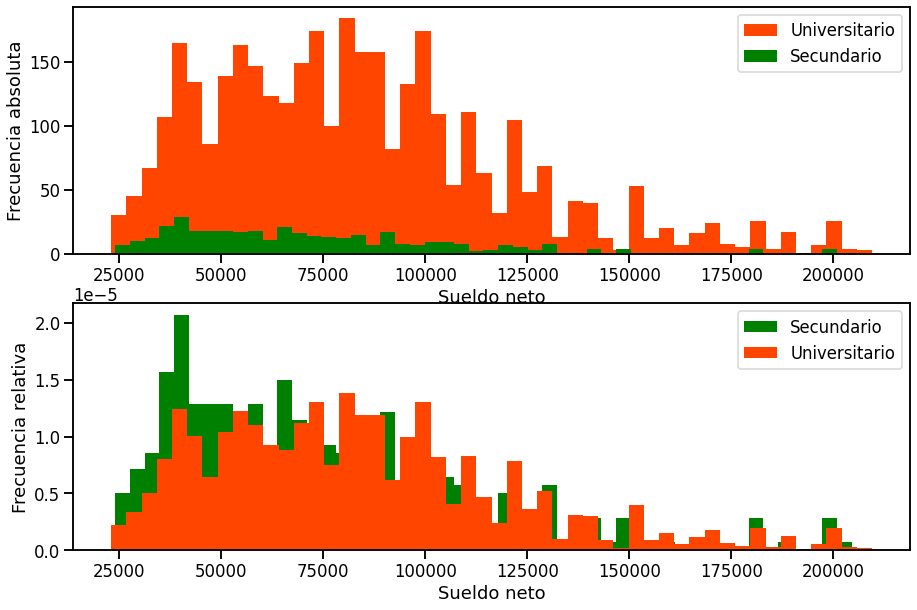

In [128]:
plt.figure(figsize=(15,10))
df_uni=df_ej2C[(df_ej2C ['nivel_estudios']=='Universitario')]
#df_terc=df_ej2C[(df_ej2C ['nivel_estudios']=='Terciario')]
df_sec=df_ej2C[(df_ej2C ['nivel_estudios']=='Secundario')]

plt.subplot(2, 1, 1) # Cree una nueva subimagen, cuadrícula 2x1, número de serie 1, el primer número es el número de filas, 
#el segundo número es el número de columnas, que indica la disposición de las subimágenes, y el tercer número es el número de serie de las subimágenes
plt.hist(df_uni["neto"], color='orangered', bins=50, label="Universitario")
#plt.hist(df_terc["neto"], color='steelblue', bins=50, label="Terciario") 
plt.hist(df_sec["neto"], color='green', bins=50, label="Secundario")
plt.xlabel("Sueldo neto")
plt.ylabel("Frecuencia absoluta")
plt.legend(loc='upper right')

plt.subplot(2, 1, 2) # Cree un nuevo subgrafico, cuadrícula 2x1, número de secuencia 2
#plt.hist(df_terc["neto"], color='steelblue', bins=50, label="Terciario", density=True) 
plt.hist(df_sec["neto"], color='green', bins=50, label="Secundario", density=True)
plt.hist(df_uni["neto"], color='orangered', bins=50, label="Universitario", density=True)
plt.xlabel("Sueldo neto")
plt.ylabel("Frecuencia relativa")
plt.legend(loc='upper right')
plt.show()

In [129]:
perc75 = df_ej2C["neto"].quantile(0.75)
sueldos_altos = df_ej2C["neto"] > perc75 #boolenao que filtra por esta condicion

#Probabilidad de ganar un sueldo alto teniendo estudios universitarios
universitario = df_ej2C ['nivel_estudios']=='Universitario'
p_universitario= len(df_ej2C[sueldos_altos & universitario])/len(df_ej2C[universitario]) #probabilidad condicional
print(p_universitario)


0.2544130008405716


In [130]:
#Probabilidad de ganar un sueldo alto teniendo estudios secundarios
secundario = df_ej2C ['nivel_estudios']=='Secundario'
p_secundario= len(df_ej2C[sueldos_altos & secundario])/len(df_ej2C[secundario]) #probabilidad condicional
print(p_secundario)

0.18041237113402062


In [131]:
#Probabilidad de ganar un sueldo alto teniendo estudios terciarios
terciario = df_ej2C ['nivel_estudios']=='Terciario'
p_terciario= len(df_ej2C[sueldos_altos & terciario])/len(df_ej2C[terciario]) #probabilidad condicional
print(p_terciario)

0.18137254901960784


In [132]:
#Probabilidad de ganar un sueldo alto teniendo estudios de posgrado
posgrado = df_ej2C ['nivel_estudios']=='Posgrado'
p_posgrado= len(df_ej2C[sueldos_altos & posgrado])/len(df_ej2C[posgrado]) #probabilidad condicional
print(p_posgrado)

0.4551971326164875


In [133]:
#Probabilidad total de ganar un sueldo alto
p_sueldoalto=len(df_ej2C[sueldos_altos])/len(df_ej2C)
print(p_sueldoalto)

0.2454080666540428


**Para conocer si estas variables son independientes entre si, decidimos calcular la probabilidad condicional. Es decir, cual es la probabilidad de ganar sueldos altos teniendo cierto nivel de estudios. Sueldos altos fue definido como sueldos por encima del quartil 75. Esto se calculo para las poblaciones mas numerosas. De acuerdo a los resultados, observamos que la probabilidad de tener un sueldo alto teniendo estudios de posgrado son altas (45%), con sueldo promedio de 100 mil pesos aproximadamente y las probabilidades de tenerlo teniendo estudios secundarios o terciarios son bajas (18% para cada caso), con sueldos promedios de alrededor de 75 mil pesos. Teniendo en cuenta que la probabilidad de tener un sueldo alto como programador es del 24%, podemos decir que Sueldo neto y Nivel de estudio no son variables independientes.**

## d) Densidad Conjunta condicional

Elija dos variables numéricas y una categórica. 
Estudie la dispersión (scatterplot) de las dos variables discriminando en color por la variable categórica (ayuda: hue en seaborn)


--------------------------------------------------------------------------------
Para este ejercicio, elegimos:

**Variables numéricas**: Sueldo neto y años de experiencia

**Variable categorica**: Género

El scatterplot generado, si bien muestra un solapamiento general en los datos, es posible observar que los Hombres llegan a obtener mas años de experiencia, y que existen mas hombres que llegan a sueldos altos.

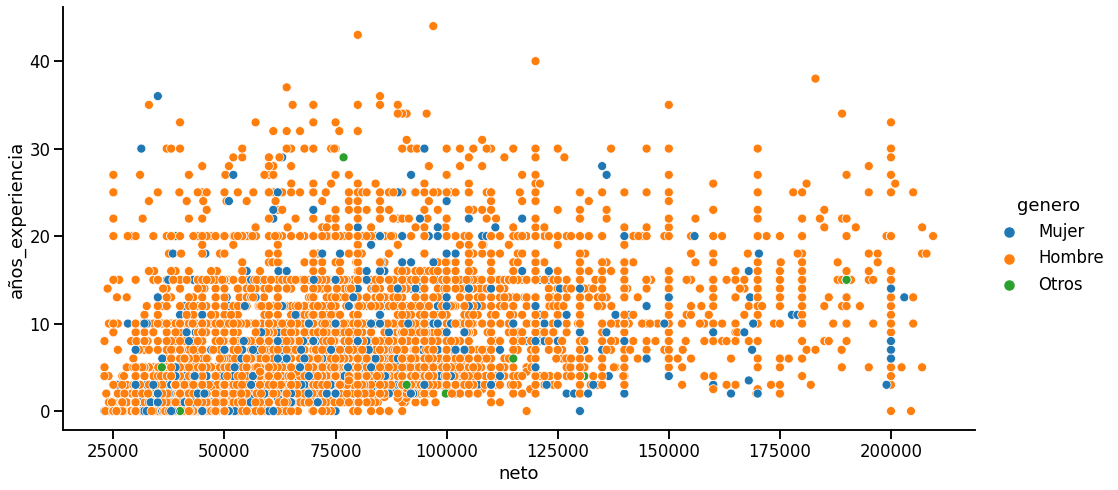

In [134]:
#Generamos un scatterplot donde se observa la relación entre los Años de experiencia y el Sueldo neto. Se coloreó de acuerdo al genero
sns.pairplot(data=df_ej2filt,
                 y_vars=['años_experiencia'],
                 x_vars=['neto'], hue="genero",
                 aspect=2, height=7)

In [142]:
df_ej2filt


,provincia,genero,años_experiencia,edad,neto
0,Ciudad Autónoma de Buenos Aires,Mujer,3.0,26,43000.0
1,Corrientes,Hombre,5.0,29,63000.0
2,Ciudad Autónoma de Buenos Aires,Mujer,2.0,22,127000.0
3,Corrientes,Hombre,15.0,39,102000.0
4,Ciudad Autónoma de Buenos Aires,Hombre,9.0,32,106000.0
...,...,...,...,...,...
6088,Provincia de Buenos Aires,Hombre,13.0,32,56450.0
6089,Ciudad Autónoma de Buenos Aires,Hombre,10.0,32,130000.0
6090,Ciudad Autónoma de Buenos Aires,Hombre,13.0,37,97000.0
6091,Ciudad Autónoma de Buenos Aires,Hombre,12.0,38,71000.0


In [136]:
# Calculamos medidas de estadistica descriptiva para las variables sueldo neto y años de experieincia agrupados por genero.
df_ej2filt[['neto','años_experiencia']].groupby(df_ej2filt.genero).describe()

neto                                                         \
         count          mean           std      min      25%      50%   
genero                                                                  
Hombre  4423.0  84018.274257  37322.748163  22980.0  55000.0  80000.0   
Mujer    830.0  74147.199506  33582.707710  23000.0  49125.0  67846.0   
Otros     25.0  80260.000000  44573.628227  34000.0  40000.0  74000.0   

                           años_experiencia                                \
             75%       max            count      mean       std  min  25%   
genero                                                                      
Hombre  105000.0  209480.0           4423.0  9.111078  7.076521  0.0  3.0   
Mujer    92810.5  203000.0            830.0  6.884096  6.094478  0.0  2.0   
Otros   101000.0  190000.0             25.0  6.080000  6.975672  0.0  2.0   

                         
        50%   75%   max  
genero                   
Hombre  8.0  13.0  44.0  
Mujer   5.0  10.0  36.0  
Otros   4.0   7.0  29.0

In [148]:
perc75 = df_ej2filt["neto"].quantile(0.75)
sueldos_altos = df_ej2filt["neto"] > perc75 
print(perc75)

102000.0


In [145]:
#Probabilidad de ganar un sueldo alto siendo mujer
mujer = df_ej2filt['genero']=='Mujer'


In [146]:
p_mujer= len(df_ej2filt[sueldos_altos & mujer])/len(df_ej2filt[mujer]) #probabilidad condicional
print(p_mujer)

0.1674698795180723


In [147]:
hombre = df_ej2filt['genero']=='Hombre'

p_hombre= len(df_ej2filt[sueldos_altos & hombre])/len(df_ej2filt[hombre]) #probabilidad condicional
print(p_hombre)

0.26000452181777073


### **Conclusión:**
-- Estos resultados muestran que las mujeres programadoras tienen 10% menos de probabilidad de ganar un sueldo alto (superior al percentil 75 de $ 102.000) que los programadores hombres. --